# Numerical Differentiation
## by Anfernee Magbutay

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def derivative(func,t, h, method='central'):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    t : number
        Compute derivative at x = t
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(t+h) - f(t-h))/2h
            forward: f(t+h) - f(t))/h
            extrapolated: (8*(f(t+h/4) - f(t-h/4)) - (f(t+h/2) - f(t-h/2)))/3/h          
    '''
    if method == 'central':
        f = func
        return (f(t + h) - f(t - i))/(2*h)
    elif method == 'forward':
        f = func
        return (f(t + h) - f(t))/h
    elif method == 'extrapolated':
        f = func
        a = 8 * (f(t + h/4) - f(t - h/4))
        b = f(t + h/2) - f(t - h/2)
        return (a - b) / (3 * h)
    else:
        raise ValueError("Method must be 'central', 'forward' or 'extrapolated'.")

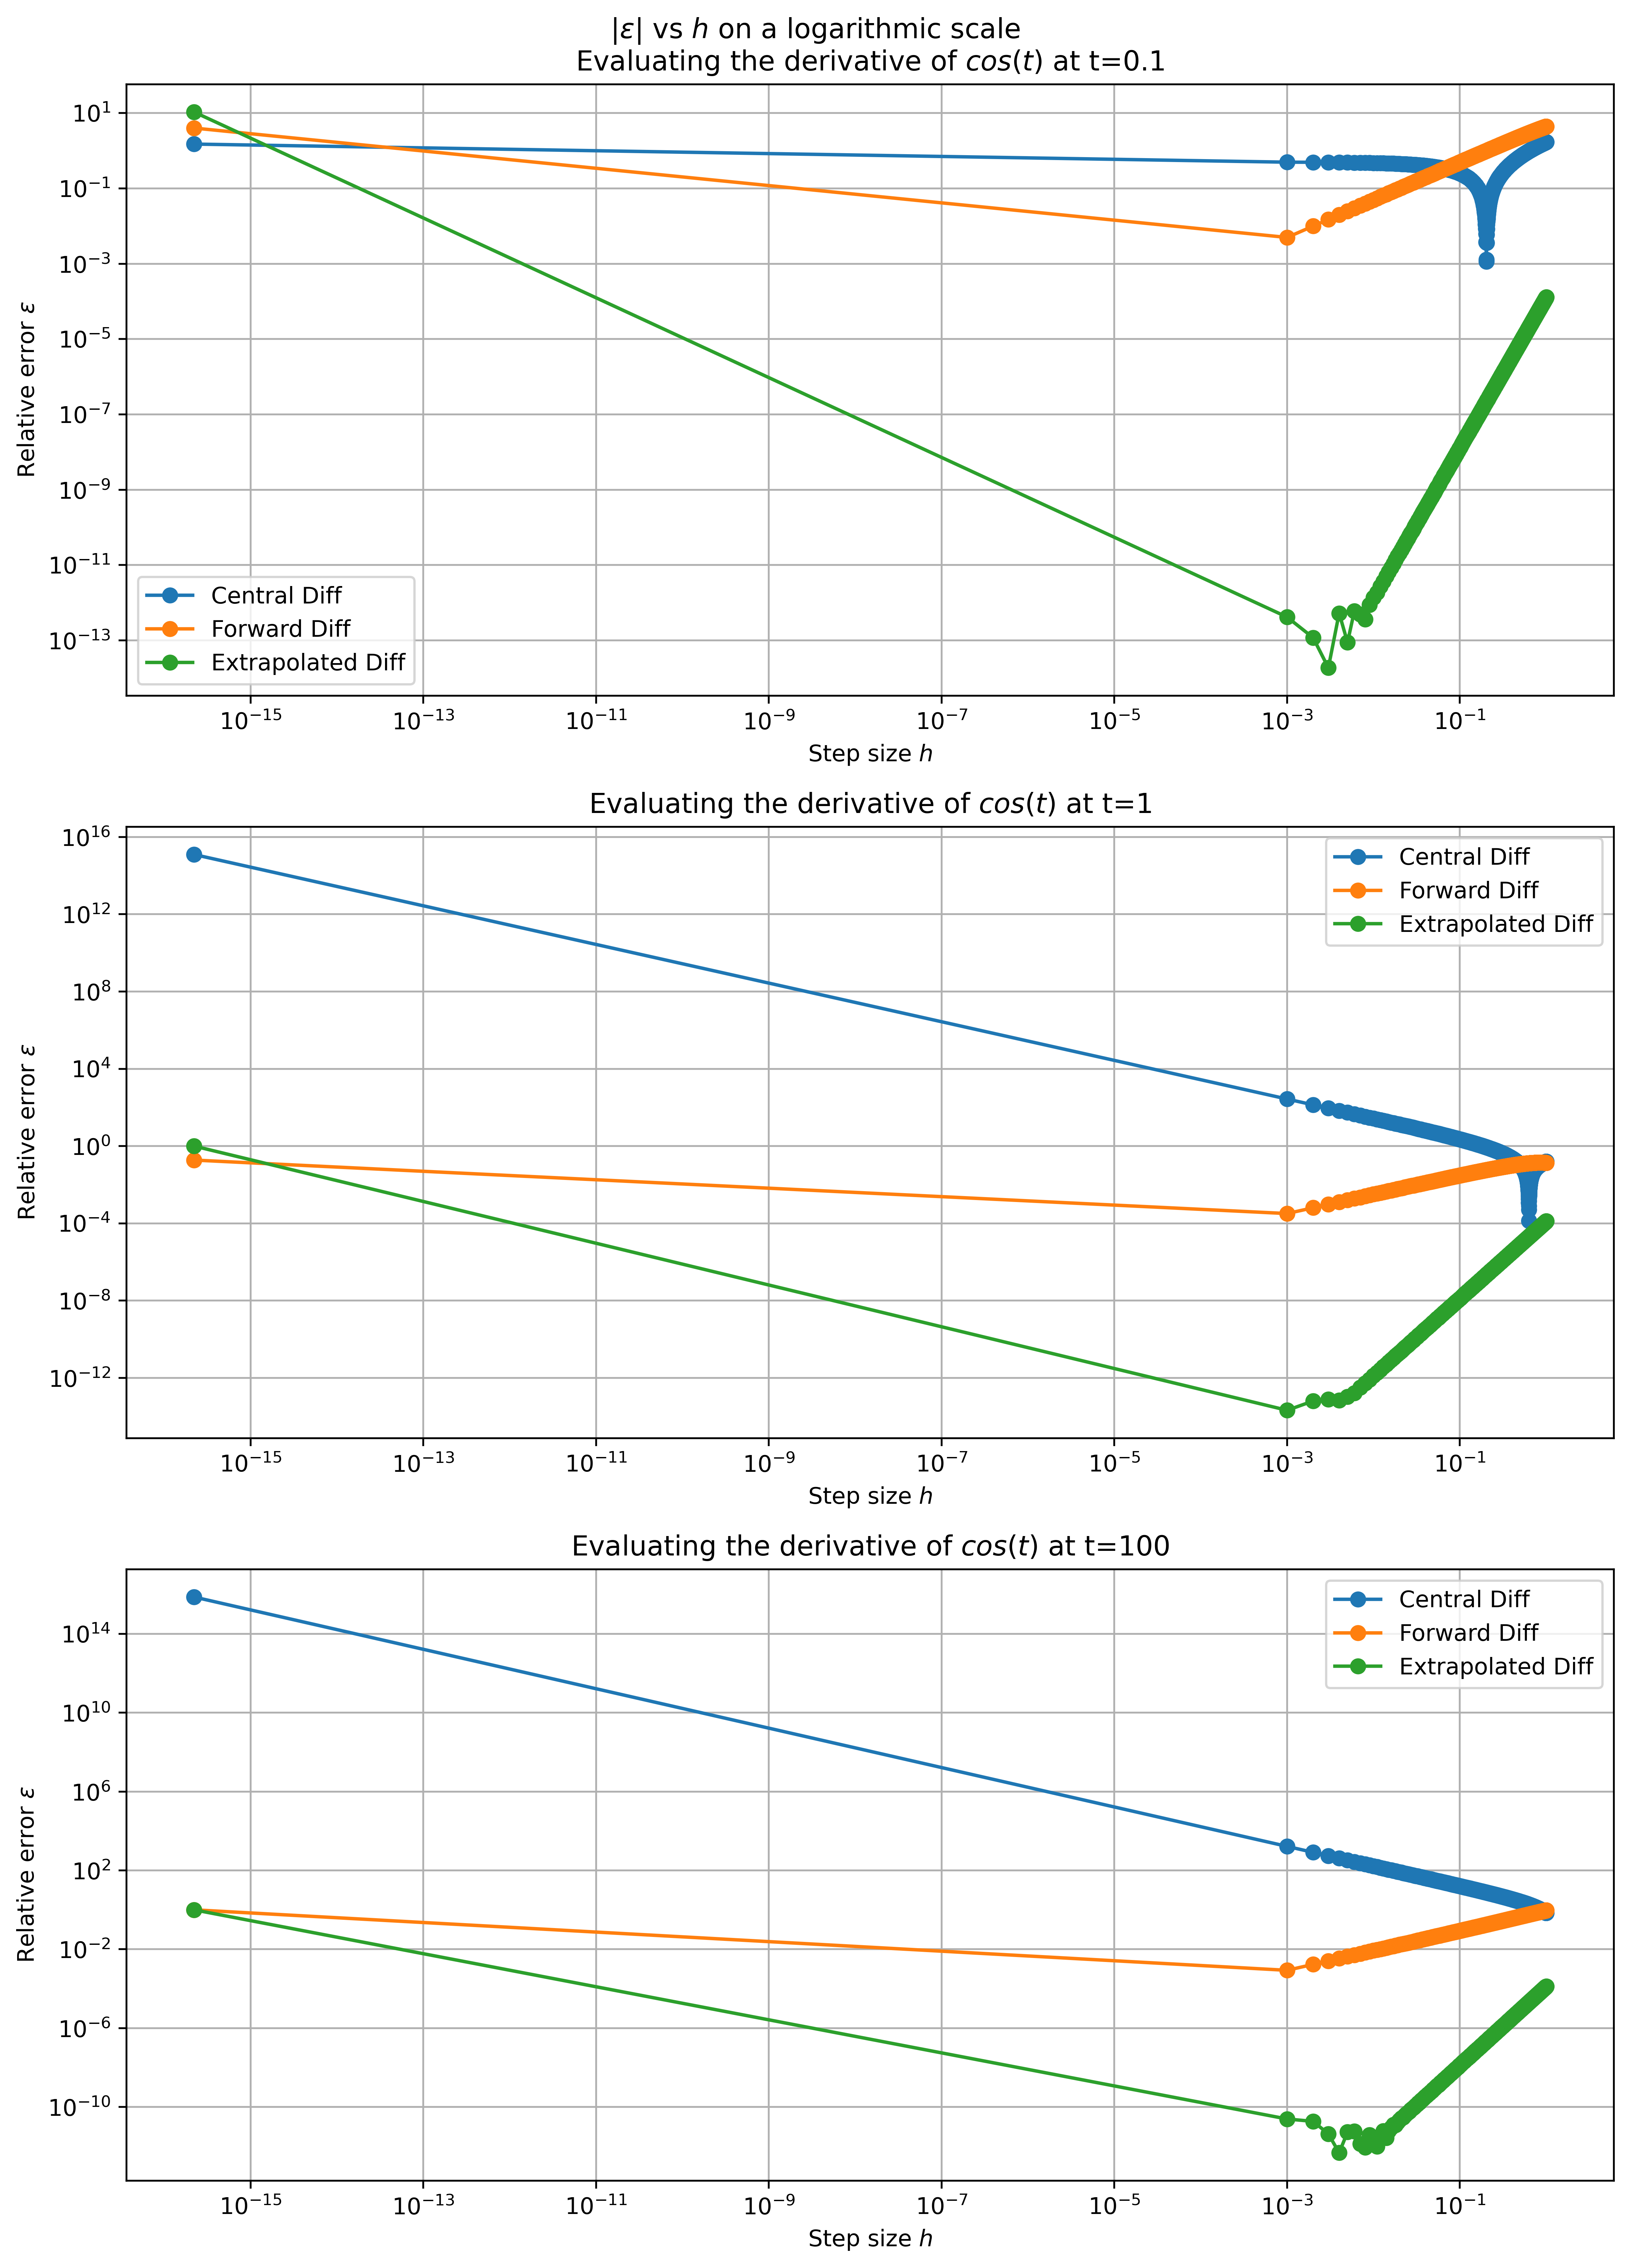

In [14]:
def func1(t):
    return np.cos(t)

values = []
hvals = np.linspace(np.finfo(float).eps, 1, 1000)
derivatives = ['central', 'forward', 'extrapolated']
methods = ['Central Diff', 'Forward Diff', 'Extrapolated Diff']
tvals = [0.1, 1, 100]

fig, ax = plt.subplots(3, 1, figsize = (10, 14), dpi = 500)
for i, t in enumerate(tvals):
    for j, Diff in enumerate(derivatives):
        vals = []
        error = []
        true_val = -np.sin(t)
        for h in hvals:
            val = derivative(func=func1, t = t, h = h, method = Diff)
            vals.append(val)
            error.append(abs((val-true_val) / true_val))
        ax[i].set_title(f'Evaluating the derivative of $cos(t)$ at t={t}')
        ax[i].set_xlabel('Step size $h$')
        ax[i].set_ylabel('Relative error $\epsilon$')
        ax[i].loglog(hvals, error, marker='o', label= methods[j])
        ax[i].legend(loc='best')
        ax[i].grid(True)

fig.suptitle('$|\epsilon|$ vs $h$ on a logarithmic scale')
plt.tight_layout()
plt.show()

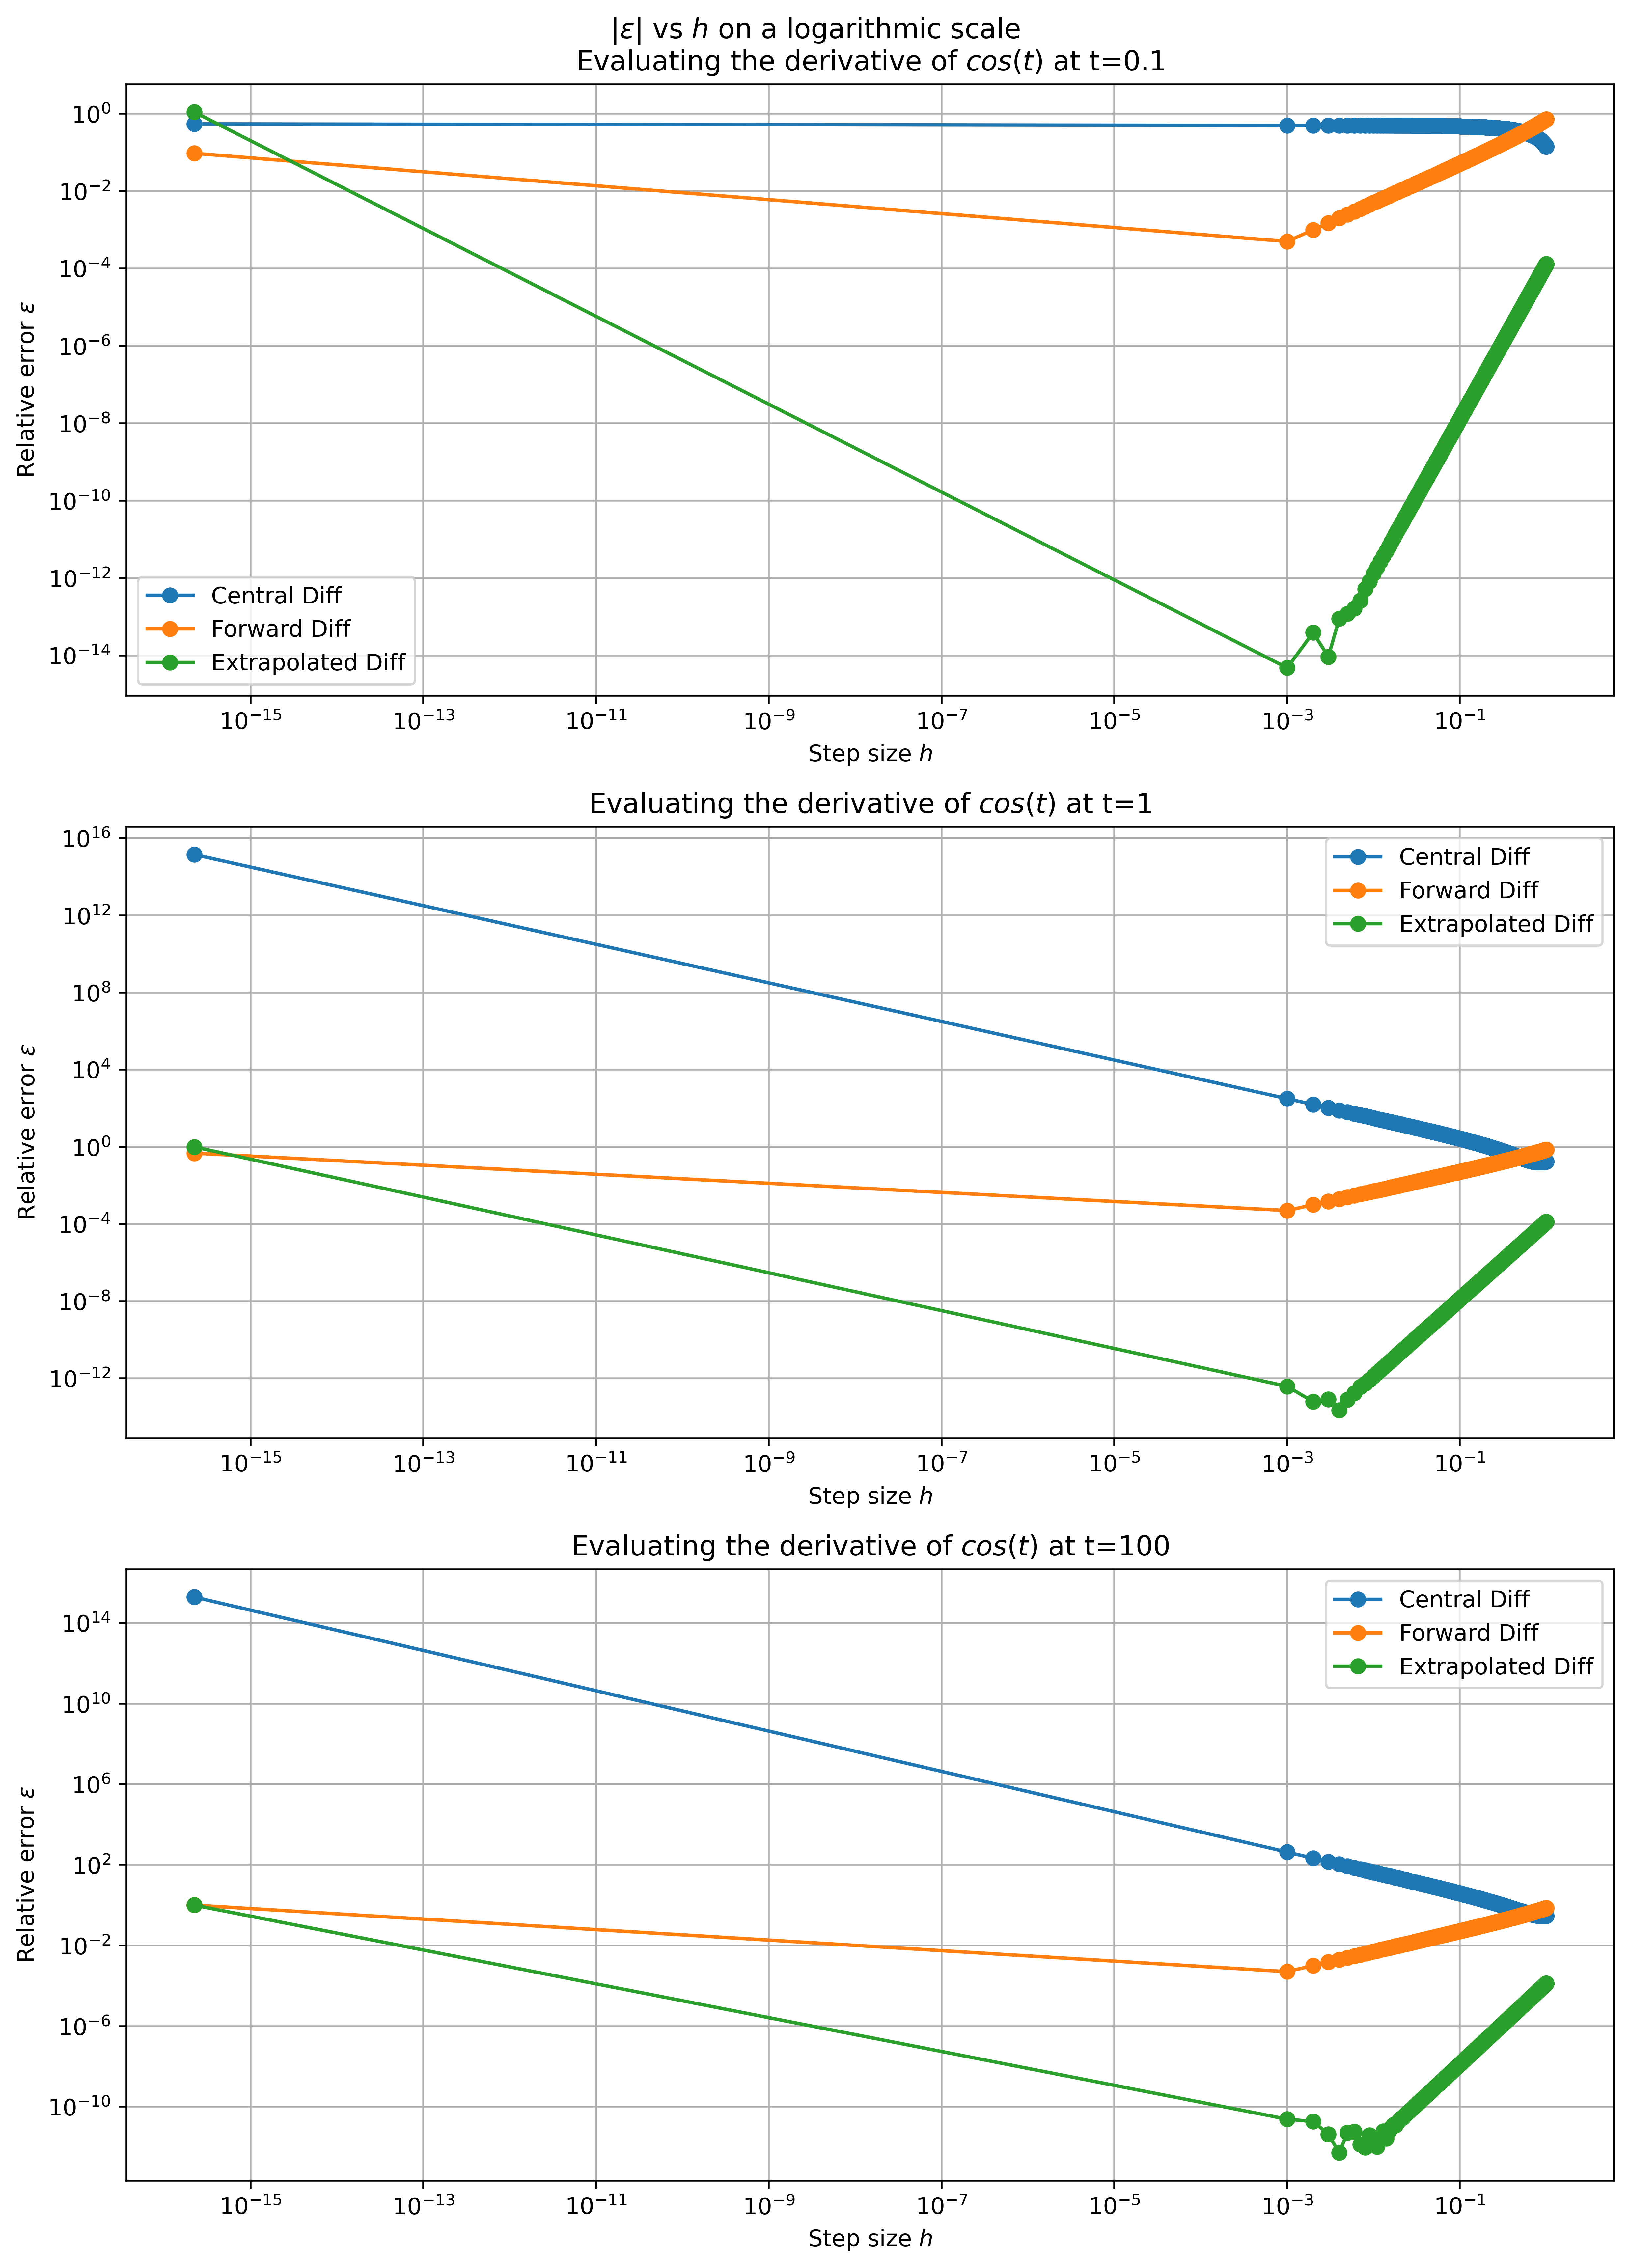

In [16]:
def func2(t):
    return np.exp(t)

values = []
hvals = np.linspace(np.finfo(float).eps, 1, 1000)
derivatives = ['central', 'forward', 'extrapolated']
methods = ['Central Diff', 'Forward Diff', 'Extrapolated Diff']
tvals = [0.1, 1, 100]

fig, ax = plt.subplots(3, 1, figsize = (10, 14), dpi = 500)
for i, t in enumerate(tvals):
    for j, Diff in enumerate(derivatives):
        vals = []
        error = []
        true_val = np.exp(t)
        for h in hvals:
            val = derivative(func=func2, t = t, h = h, method = Diff)
            vals.append(val)
            error.append(abs((val-true_val) / true_val))
        ax[i].set_title(f'Evaluating the derivative of $cos(t)$ at t={t}')
        ax[i].set_xlabel('Step size $h$')
        ax[i].set_ylabel('Relative error $\epsilon$')
        ax[i].loglog(hvals, error, marker='o', label= methods[j])
        ax[i].legend(loc='best')
        ax[i].grid(True)

fig.suptitle('$|\epsilon|$ vs $h$ on a logarithmic scale')
plt.tight_layout()
plt.show()

## Conclusion
For very small values of **h**, the error increases. This error is called the "round-off error" which happens when dealing with extremely small values (close to machine epsilon). As we go to larger values of **h** however, the error decreases. But as we go to much larger values, we see the error increase again. We realize this error is now due to "algorithmic error" (series truncation). Thus when choosing for values of **h**, we must acknowledge the trade offs of _round-off_ and _algorithmic error_